<a href="https://colab.research.google.com/github/2303a52209/Statistical-Machine-Learning/blob/main/STML_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("/content/ClassicHit.csv")
print('There are {} rows and {} columns.'.format(df.shape[0],df.shape[1]))
df.head()

There are 15150 rows and 18 columns.


,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity        15150 non-null  int64 

In [ ]:
print(f"The number of artists are {df['Artist'].unique().shape[0]}")
print(f"The number of genres are {df['Genre'].unique().shape[0]}")
print(f"The Genres are: {', '.join(df['Genre'].unique())}")

The number of artists are 3083
The number of genres are 19
The Genres are: Alt. Rock, Blues, Country, Disco, EDM, Folk, Funk, Gospel, Jazz, Metal, Pop, Punk, R&B, Rap, Reggae, Rock, SKA, Today, World


In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

          Track Artist  Year  Duration  Time_Signature  Danceability  Energy  \
3639  Happy Now   Zedd  2019    207029               3         0.503   0.741   
3640  Happy Now   Zedd  2019    207029               3         0.503   0.741   

      Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
3639    4    -5.128     1        0.047         0.579          0.000001   
3640    4    -5.128     1        0.047         0.579          0.000001   

      Liveness  Valence   Tempo  Popularity Genre  
3639    0.0712    0.458  88.335          63   EDM  
3640    0.0712    0.458  88.335          63   EDM  


***Visualizations (Exploratory Data Analysis)***

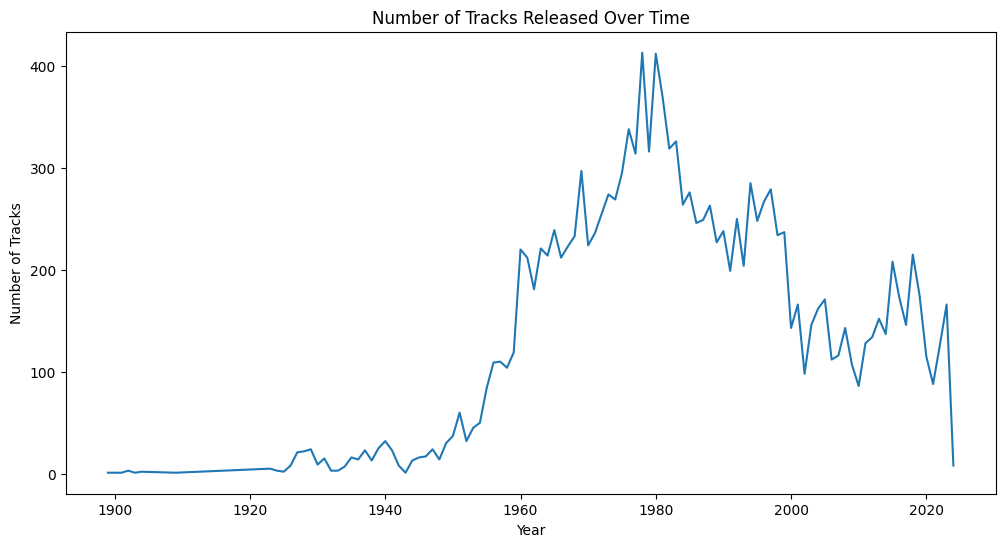

In [ ]:
tracks_per_year = df.groupby('Year').size().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values)
plt.title('Number of Tracks Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

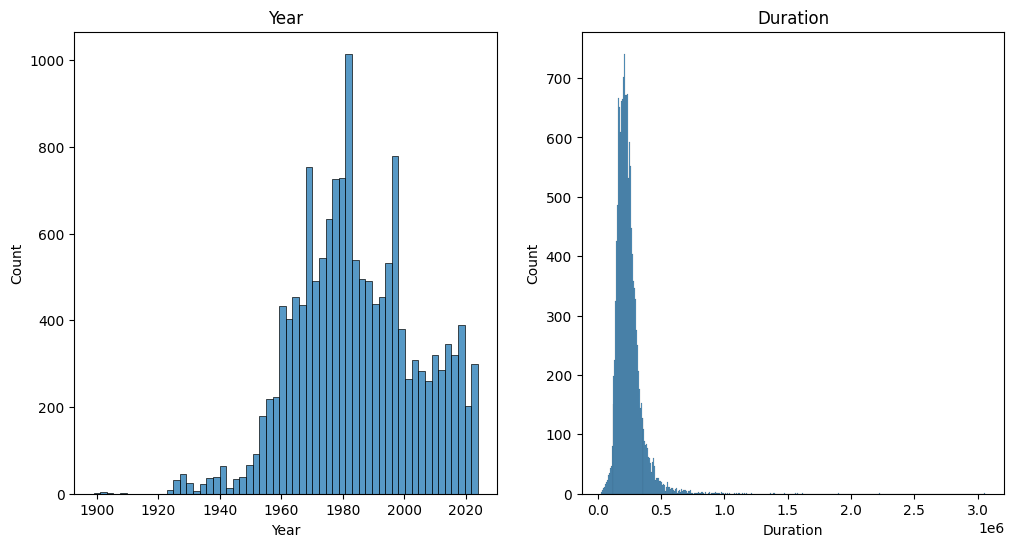

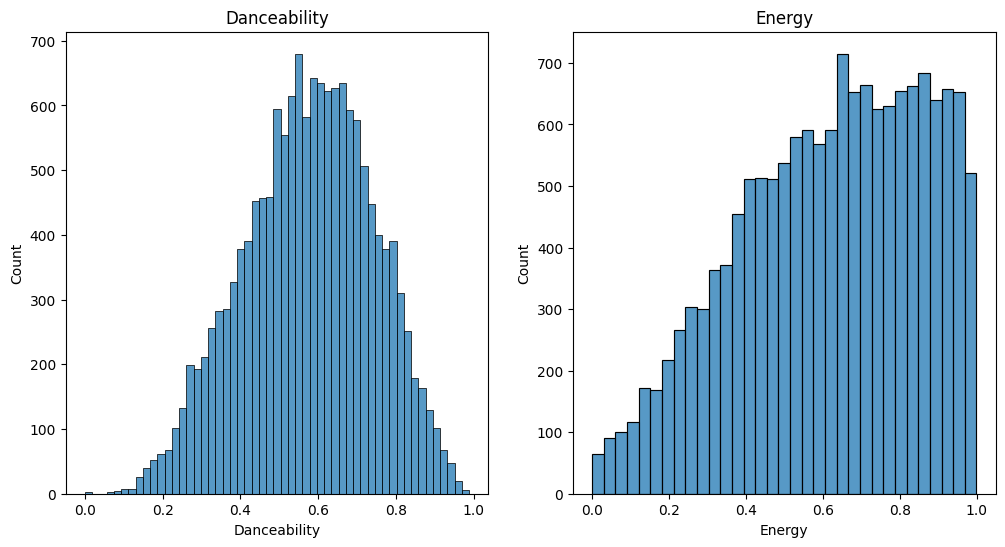

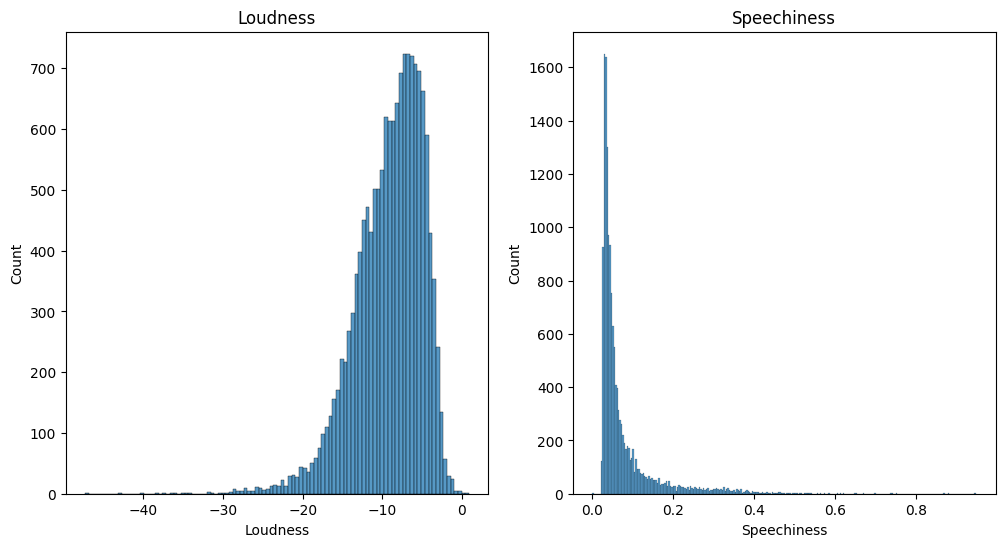

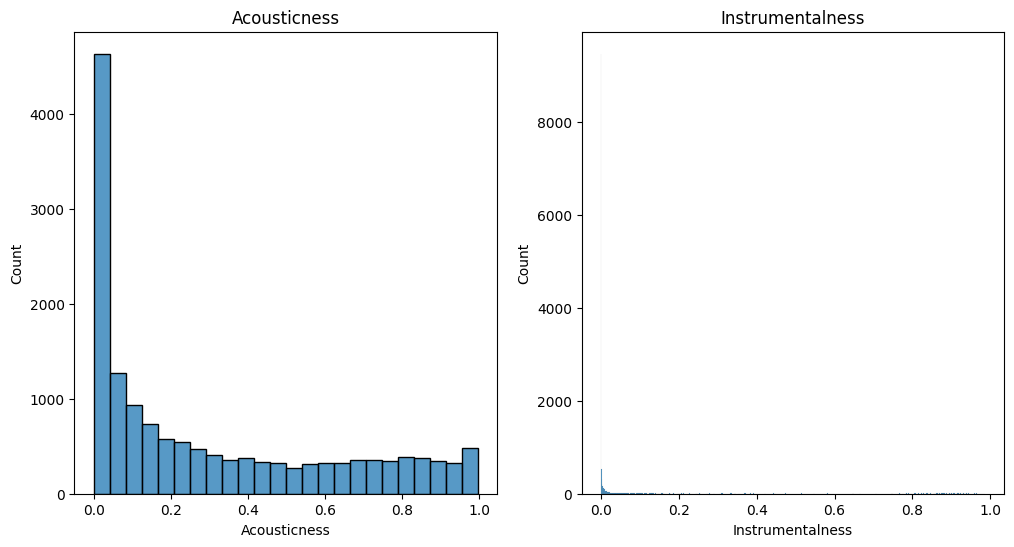

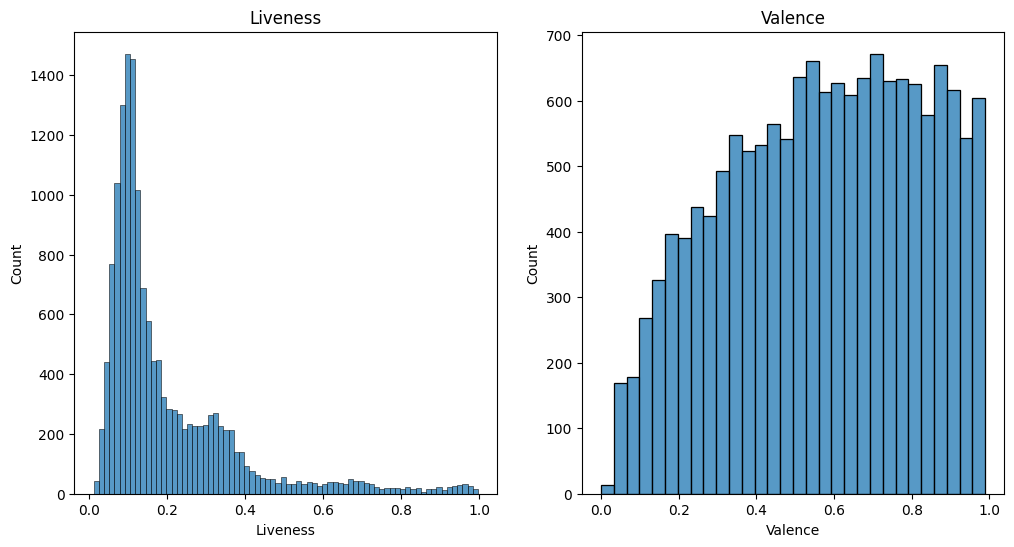

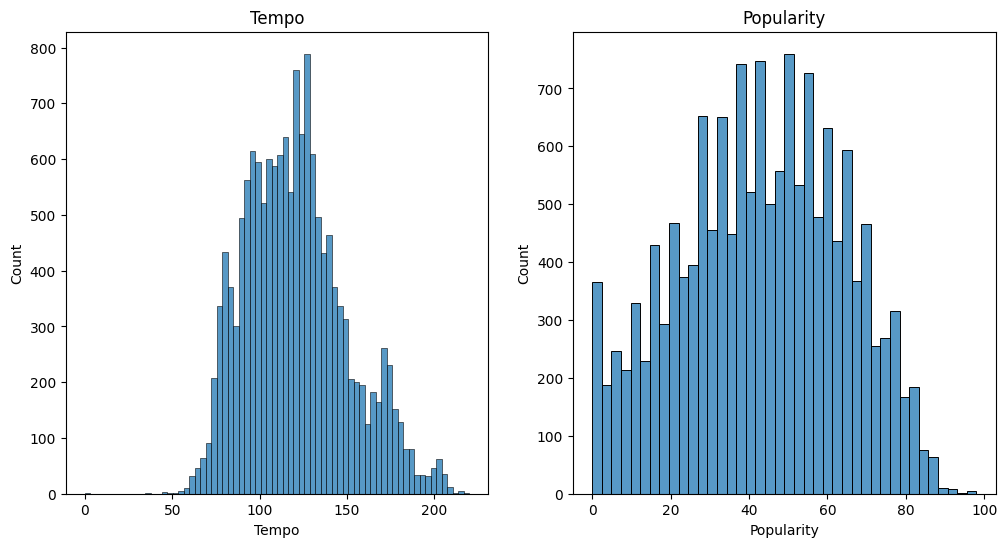

In [ ]:
def histogram_plot(col1, col2):
    f, axs = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(data = df, x = col1, ax = axs[0])
    axs[0].set_title(col1)
    sns.histplot(data = df, x = col2, ax = axs[1])
    axs[1].set_title(col2)
    plt.show()


def send_columns(arr):
    for i in range(0, len(arr), 2):
        if i + 1 < len(arr):
            histogram_plot(arr[i], arr[i + 1])

columns = ['Year', 'Duration', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness','Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity']
send_columns(columns)

In [ ]:
earliest_year = df['Year'].min()
print(f"The earliest year in the dataset is {earliest_year}")

most_recent_year = df['Year'].max()
print(f"The most recent year in the dataset is {most_recent_year}")

The earliest year in the dataset is 1899
The most recent year in the dataset is 2024


In [ ]:
tracks_earliest_year = df[df['Year'] == earliest_year].shape[0]
print(f"Number of tracks for the earliest year ({earliest_year}): {tracks_earliest_year}")


tracks_most_recent_year = df[df['Year'] == most_recent_year].shape[0]
print(f"Number of tracks for the most recent year ({most_recent_year}): {tracks_most_recent_year}")

Number of tracks for the earliest year (1899): 1
Number of tracks for the most recent year (2024): 8


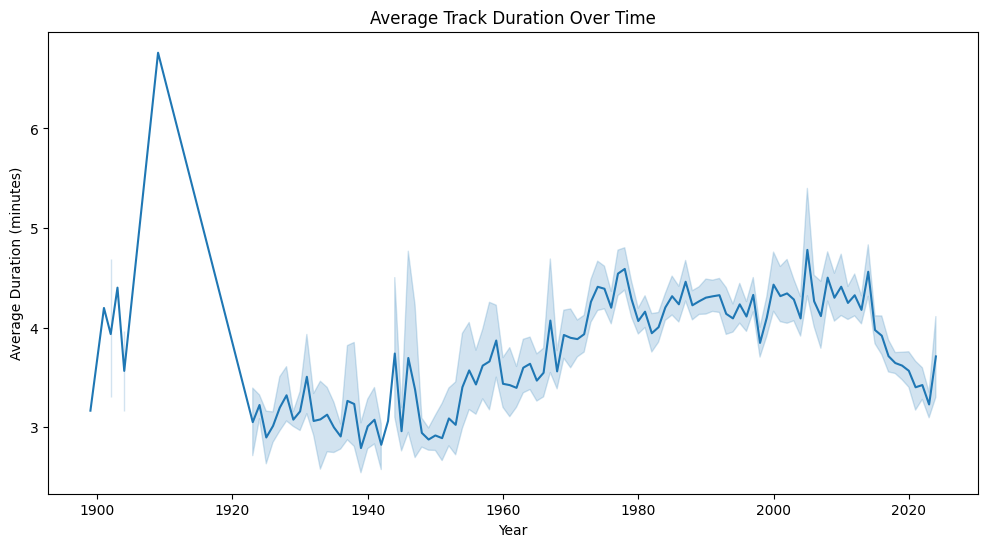

In [ ]:
df_temp = df.copy()
df_temp['Duration_min'] = df_temp['Duration'] / 60000

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Duration_min', data=df_temp, estimator='mean')
plt.title('Average Track Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

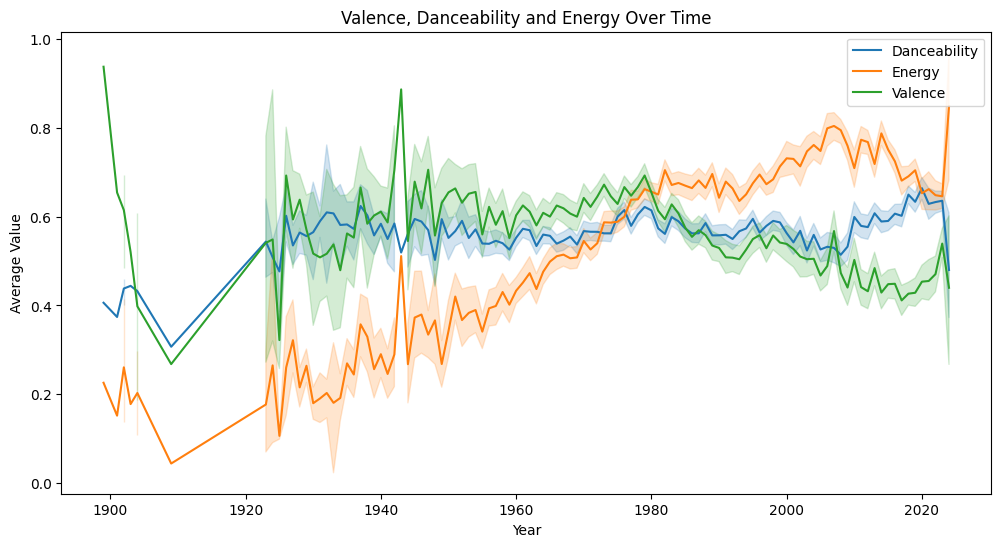

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Danceability', data=df, estimator='mean', label='Danceability')
sns.lineplot(x='Year', y='Energy', data=df, estimator='mean', label='Energy')
sns.lineplot(x='Year', y='Valence', data=df, estimator='mean', label='Valence')
plt.title('Valence, Danceability and Energy Over Time')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

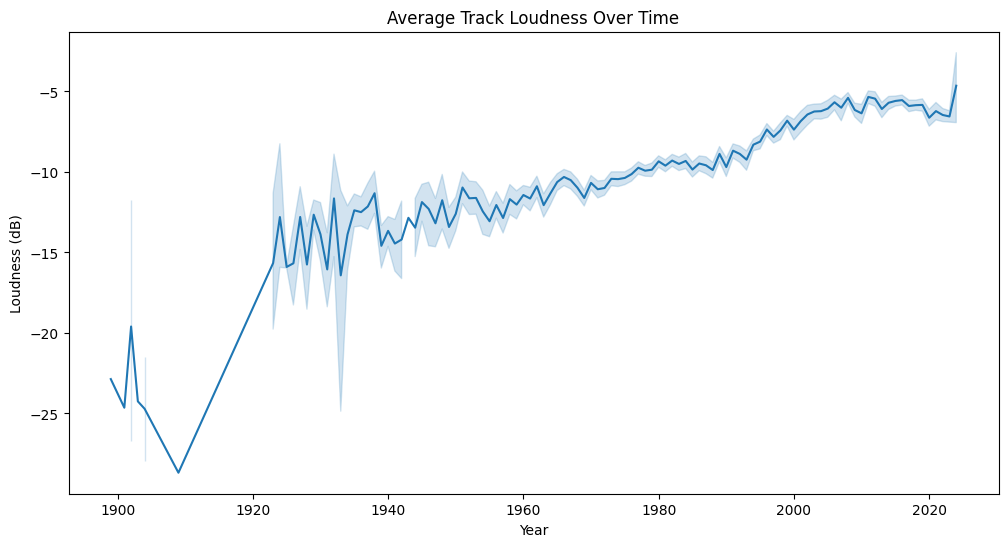

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Loudness', data=df, estimator='mean')
plt.title('Average Track Loudness Over Time')
plt.xlabel('Year')
plt.ylabel('Loudness (dB)')
plt.show()

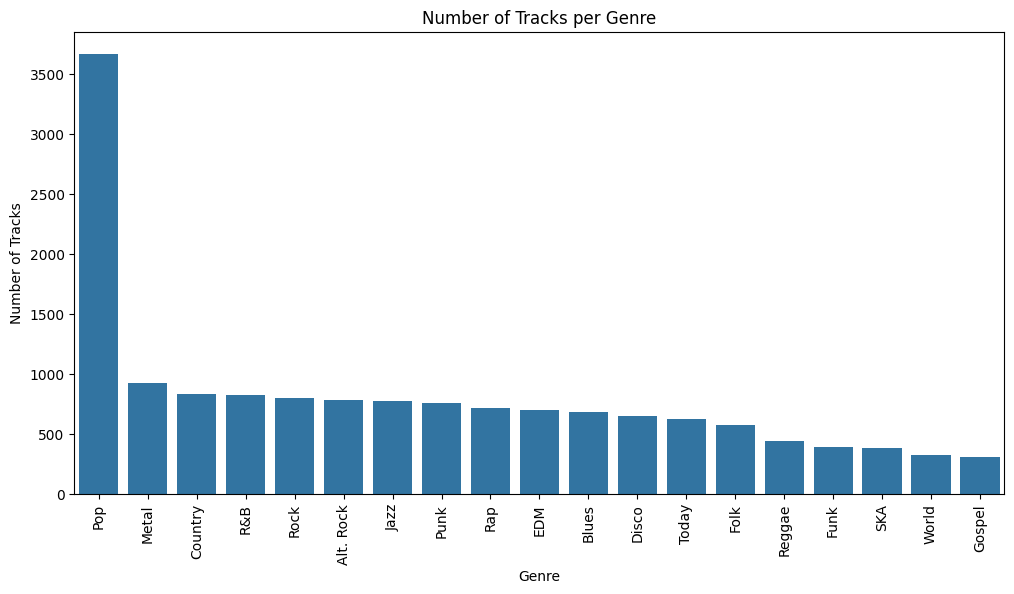

In [ ]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Tracks per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)
plt.show()

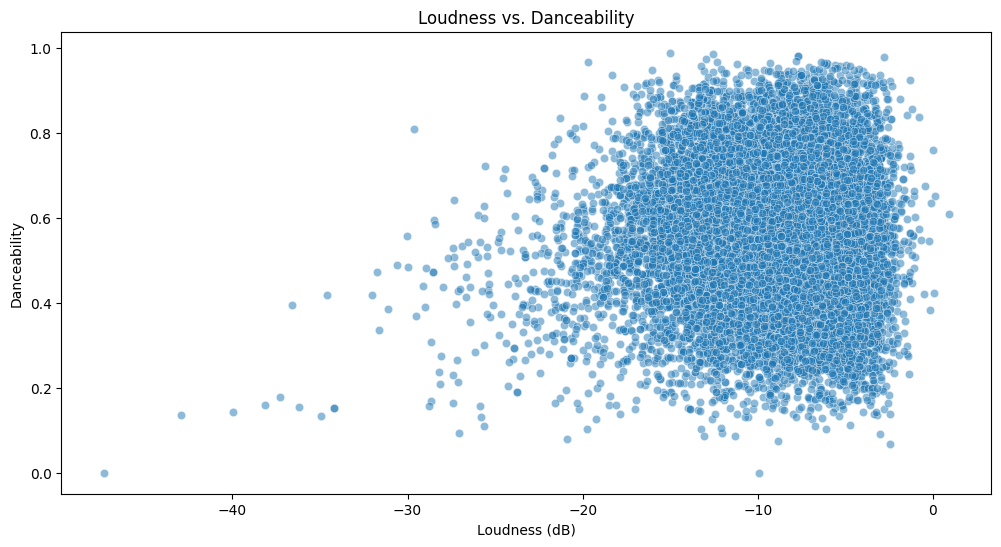

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Loudness', y='Danceability', data=df, alpha=0.5)

plt.title('Loudness vs. Danceability')
plt.xlabel('Loudness (dB)')
plt.ylabel('Danceability')
plt.show()

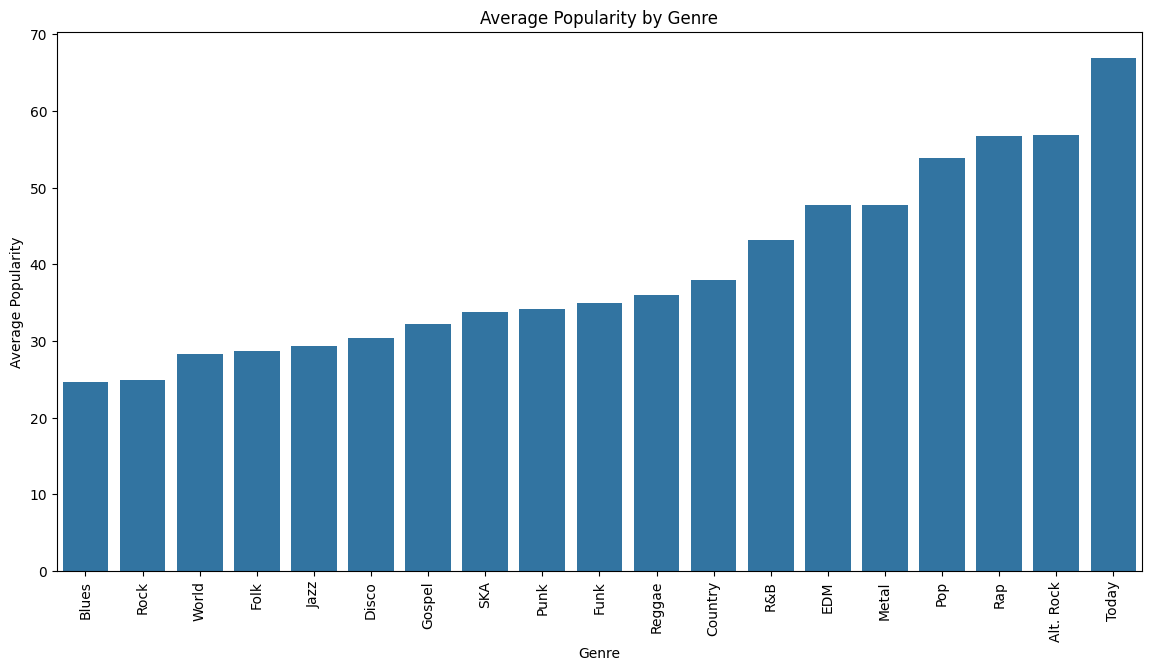

In [ ]:
plt.figure(figsize=(14, 7))

average_popularity = df.groupby('Genre')['Popularity'].mean().sort_values()

sns.barplot(x=average_popularity.index, y=average_popularity.values)

plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

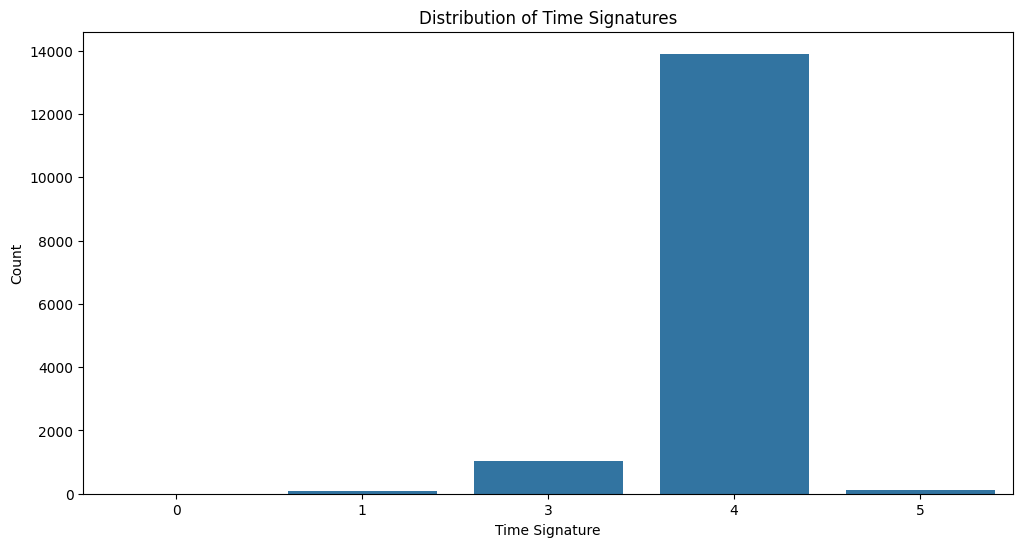

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Time_Signature', data=df)
plt.title('Distribution of Time Signatures')
plt.xlabel('Time Signature')
plt.ylabel('Count')
plt.show()

                                      Track      Genre  Popularity
615                                    Iris  Alt. Rock          88
998                         Bad To The Bone      Blues          69
1646                                 9 to 5    Country          80
2305                          Dancing Queen      Disco          85
3557               Something Just Like This        EDM          88
4125   California Dreamin' - Single Version       Folk          80
4564                            Funny Thing       Funk          75
4779                                You Say     Gospel          72
5423                 What A Wonderful World       Jazz          78
6034                    Sweet Child O' Mine      Metal          86
9477                                   Babe        Pop          96
10380                                Dammit       Punk          68
11825      Yeah! (feat. Lil Jon & Ludacris)        R&B          85
12029                             One Dance        Rap        

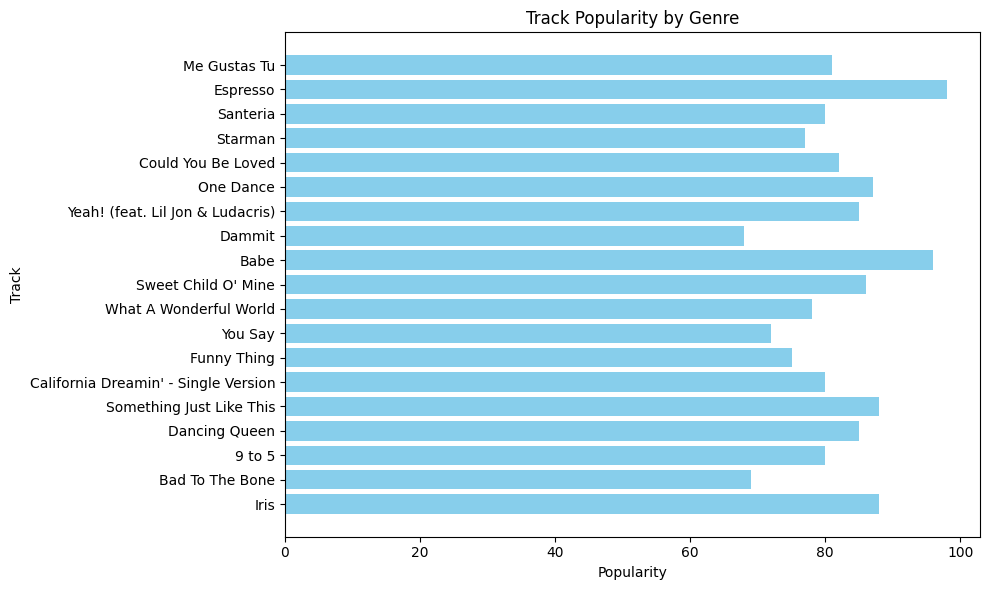

In [ ]:
#Highest Popularity tracks from each Genre
highest_popularity_tracks = df.loc[df.groupby('Genre')['Popularity'].idxmax()]
print(highest_popularity_tracks[['Track','Genre','Popularity']])

plt.figure(figsize=(10, 6))
plt.barh(highest_popularity_tracks['Track'], highest_popularity_tracks['Popularity'], color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Track')
plt.title('Track Popularity by Genre')
plt.tight_layout()
plt.show()

                                                   Track      Genre  \
222                                   Goodbye Sky Harbor  Alt. Rock   
1441                                           East-West      Blues   
2180                                   Travelin' Soldier    Country   
2476                               Love To Love You Baby      Disco   
3293                                  The Messenger 2012        EDM   
3657                        Alice's Restaurant Massacree       Folk   
4584                             Say What Whip It (Live)       Funk   
4836                                 There's an Overflow     Gospel   
5493                              Free Jazz - Pts. 1 & 2       Jazz   
5948           A Change of Seasons - The Crimson Sunrise      Metal   
8738                                       Tubular Bells        Pop   
10676                                        The Decline       Punk   
11321                       By The Time I Get To Phoenix        R&B   
12105 

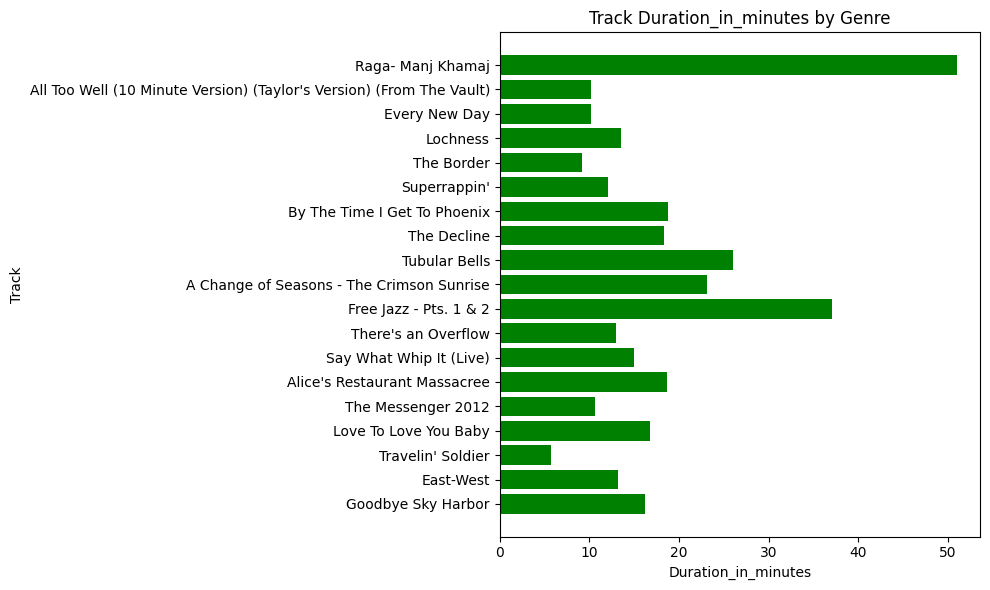

In [ ]:
#Most Lengthy song from each Genre
df['Duration_in_minutes'] = df['Duration'] / 60000
lengthy = df.loc[df.groupby('Genre')['Duration'].idxmax()]
print(lengthy[['Track','Genre','Duration_in_minutes']])

plt.figure(figsize=(10, 6))
plt.barh(lengthy['Track'], lengthy['Duration_in_minutes'], color='green')
plt.xlabel('Duration_in_minutes')
plt.ylabel('Track')
plt.title('Track Duration_in_minutes by Genre')
plt.tight_layout()
plt.show()

                                             Track      Genre  Danceability
32                                      Hey Ladies  Alt. Rock         0.949
1020                           How Many More Years      Blues         0.924
1661                               It Must Be Love    Country         0.919
2821                                State of Shock      Disco         0.980
3099                              Around the World        EDM         0.956
3853                                         Crazy       Folk         0.890
4298                                      Chase Me       Funk         0.955
4629                                 Coming In Hot     Gospel         0.889
5452             Not Tonight (feat. Carl Carlwell)       Jazz         0.904
5973                                 We Care a Lot      Metal         0.799
10143                            Funky Cold Medina        Pop         0.988
11027  Three Girl Rhumba - 2006 Remastered Version       Punk         0.937
11155       

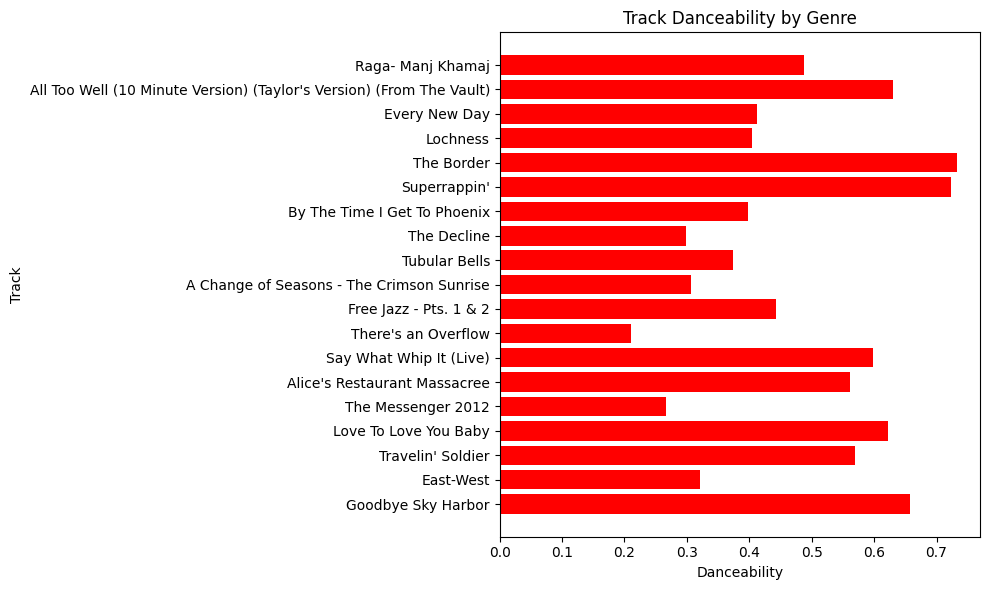

In [ ]:
#Best songs for Dancing from each Genre
dancing = df.loc[df.groupby('Genre')['Danceability'].idxmax()]
print(dancing[['Track','Genre','Danceability']])

plt.figure(figsize=(10, 6))
plt.barh(lengthy['Track'], lengthy['Danceability'], color='red')
plt.xlabel('Danceability')
plt.ylabel('Track')
plt.title('Track Danceability by Genre')
plt.tight_layout()
plt.show()

In [ ]:
positive = df.loc[df.groupby('Genre')['Valence'].idxmax()]
print(positive[['Track','Genre','Valence']])

plt.figure(figsize=(10, 6))
plt.barh(lengthy['Track'], lengthy['Valence'], color='black')
plt.xlabel('Valence')
plt.ylabel('Track')
plt.title('Track Positivity by Genre')
plt.tight_layout()
plt.show()

                                        Track      Genre  Valence
554                               Mesopotamia  Alt. Rock    0.971
968                                San-Ho-Zay      Blues    0.975
1650                            Blue,Blue Day    Country    0.978
2416                            Rebels Are We      Disco    0.984
3524                             LUV U NEED U        EDM    0.975
4058                                   99.9 F       Folk    0.976
4600                                Low Rider       Funk    0.989
4920                                  Victory     Gospel    0.964
5143                             Crazy Rhythm       Jazz    0.973
5917                   Down with the Sickness      Metal    0.941
9711                     What A Fool Believes        Pop    0.985
10641                                  Corona       Punk    0.977
11835                               Low Rider        R&B    0.989
12283  What's Your Fantasy (Featuring Shawna)        Rap    0.967
12856     

NameError: name 'lengthy' is not defined

<Figure size 1000x600 with 0 Axes>

**Now we continue to machine learning -> Regression & Classification **

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
data = pd.read_csv('/content/ClassicHit.csv')

In [ ]:
data = data.dropna()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions) * 145:.2f}%")

SVM Accuracy: 0.5201320132013202
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.27      0.34       243
           1       0.41      0.28      0.34       190
           2       0.38      0.32      0.35       241
           3       0.51      0.52      0.51       200
           4       0.65      0.64      0.65       219
           5       0.43      0.24      0.31       189
           6       0.23      0.03      0.05       110
           7       0.53      0.32      0.40       102
           8       0.59      0.68      0.63       224
           9       0.50      0.61      0.55       269
          10       0.53      0.83      0.64      1116
          11       0.60      0.55      0.57       249
          12       0.35      0.05      0.09       242
          13       0.62      0.71      0.66       225
          14       0.43      0.33      0.38       126
          15       0.39      0.39      0.39       230
          16       0

In [ ]:
# 2. k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
# 2. k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, knn_predictions))
print("k-NN Classification Report:\n", classification_report(y_test, knn_predictions))
print(f"k-NN Accuracy: {accuracy_score(y_test, knn_predictions) * 250:.2f}%")

k-NN Accuracy: 0.35115511551155115
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.36      0.25       243
           1       0.19      0.35      0.25       190
           2       0.22      0.37      0.27       241
           3       0.26      0.41      0.32       200
           4       0.43      0.61      0.51       219
           5       0.17      0.17      0.17       189
           6       0.07      0.08      0.08       110
           7       0.24      0.19      0.21       102
           8       0.53      0.49      0.51       224
           9       0.36      0.45      0.40       269
          10       0.51      0.47      0.49      1116
          11       0.49      0.33      0.39       249
          12       0.14      0.05      0.08       242
          13       0.56      0.42      0.48       225
          14       0.43      0.17      0.24       126
          15       0.35      0.13      0.19       230
          16     

In [ ]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print(f"Decision Tree Classification Report:\n{classification_report(y_test, dt_predictions)}")
print("Decision Tree Classification Report:\n", "{:.2f}%".format(accuracy_score(y_test, dt_predictions) * 200))

Decision Tree Accuracy: 0.39515951595159515
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.22      0.24       243
           1       0.28      0.30      0.29       190
           2       0.25      0.26      0.26       241
           3       0.34      0.33      0.33       200
           4       0.55      0.46      0.50       219
           5       0.26      0.20      0.23       189
           6       0.13      0.17      0.15       110
           7       0.35      0.33      0.34       102
           8       0.52      0.52      0.52       224
           9       0.42      0.48      0.45       269
          10       0.57      0.56      0.56      1116
          11       0.44      0.45      0.45       249
          12       0.14      0.14      0.14       242
          13       0.47      0.45      0.46       225
          14       0.29      0.33      0.31       126
          15       0.24      0.27      0.25       230

In [ ]:
# 4. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# 4. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print(f"{accuracy_score(y_test, rf_predictions) * 155:.2f}%")

Random Forest Accuracy: 0.5592959295929593
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.27      0.37       243
           1       0.56      0.34      0.42       190
           2       0.46      0.32      0.37       241
           3       0.54      0.52      0.53       200
           4       0.70      0.75      0.72       219
           5       0.49      0.32      0.39       189
           6       0.21      0.11      0.14       110
           7       0.65      0.35      0.46       102
           8       0.66      0.76      0.70       224
           9       0.59      0.68      0.63       269
          10       0.54      0.84      0.66      1116
          11       0.67      0.64      0.65       249
          12       0.33      0.13      0.19       242
          13       0.66      0.69      0.68       225
          14       0.58      0.33      0.42       126
          15       0.42      0.42      0.42       230


In [ ]:
# 5. Linear Regression (convert predictions to binary for classification)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_predictions = [1 if pred >= 0.5 else 0 for pred in lr_predictions]
print("Linear Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Linear Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print(f"Linear Regression Accuracy: {accuracy_score(y_test, lr_predictions) * 1900:.2f}%")

Linear Regression Accuracy: 0.041804180418041806
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.04      1.00      0.08       190
           2       0.00      0.00      0.00       241
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       219
           5       0.00      0.00      0.00       189
           6       0.00      0.00      0.00       110
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00       224
           9       0.00      0.00      0.00       269
          10       0.00      0.00      0.00      1116
          11       0.00      0.00      0.00       249
          12       0.00      0.00      0.00       242
          13       0.00      0.00      0.00       225
          14       0.00      0.00      0.00       126
          15       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
